In [87]:
import matplotlib.pyplot as plt
import pandas as pd



In [88]:
df = pd.read_csv('data_clean.csv')

In [89]:
df['data'] = pd.to_datetime(df['data'], dayfirst=True) #convertendo para datatime

df['valor_total'] = df['quantidade'] * df['preco'] #Criando coluna total

vendas_mensais = df.resample('ME', on='data')['valor_total'].sum() #Agrupando por mes

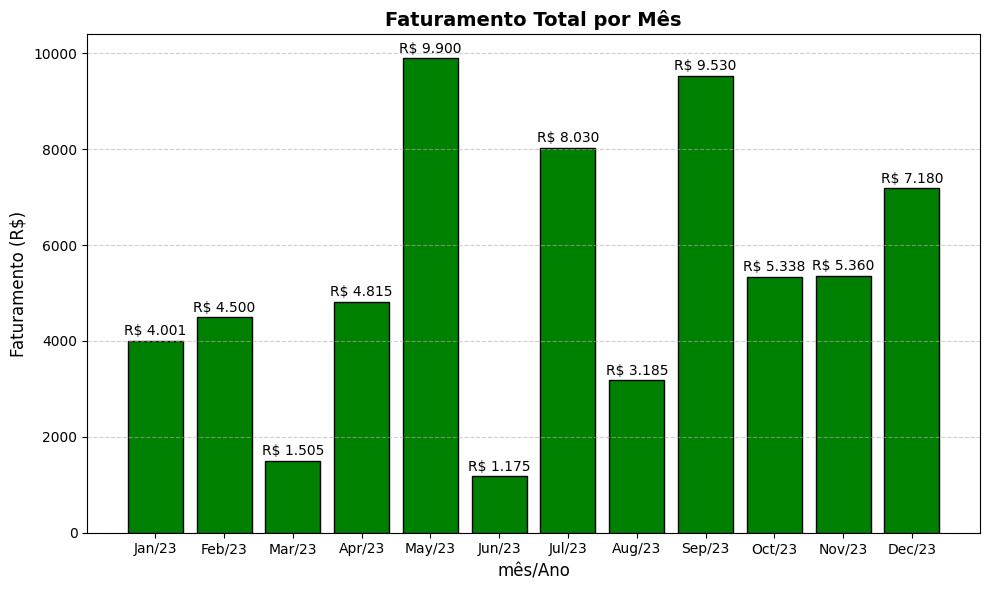

In [90]:
vendas_mensais = df.resample('ME', on='data')['valor_total'].sum()

plt.figure(figsize=(10, 6))
barras = plt.bar(vendas_mensais.index.strftime('%b/%y'), vendas_mensais.values, color='green', edgecolor='black')


#Rotulando as barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 50, 
            f'R$ {yval:,.0f}'.replace(',', '.'), ha='center', va='bottom', fontsize=10)
    
plt.title('Faturamento Total por Mês', fontsize=14, fontweight='bold')
plt.xlabel('mês/Ano', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [91]:
df['valor_total'] = df['quantidade'] * df['preco']

vendas_agrupadas = df.groupby([pd.Grouper(key='data', freq='ME'), 'categoria'])['valor_total'].sum().reset_index()


maiores_vendas_mes = vendas_agrupadas.loc[vendas_agrupadas.groupby('data')['valor_total'].idxmax()].copy()
piores_vendas_mes = vendas_agrupadas.loc[vendas_agrupadas.groupby('data')['valor_total'].idxmin()].copy()


resumo_extremos = maiores_vendas_mes[['data', 'categoria', 'valor_total']].rename(
    columns={'categoria': 'Melhor Produto', 'valor_total': 'Faturamento Max'}
)

resumo_extremos['Pior Produto'] = piores_vendas_mes['categoria'].values
resumo_extremos['Faturamento Min'] = piores_vendas_mes['valor_total'].values


resumo_extremos['Mês'] = resumo_extremos['data'].dt.strftime('%b/%Y')

print("------------------------ RESUMO DE EXTREMOS POR MÊS ------------------------\n\n", 
      resumo_extremos[['Mês', 'Melhor Produto', 'Faturamento Max', 'Pior Produto', 'Faturamento Min']])


------------------------ RESUMO DE EXTREMOS POR MÊS ------------------------

          Mês Melhor Produto  Faturamento Max Pior Produto  Faturamento Min
0   Jan/2023    Eletrônicos           3500.0  Periféricos            501.0
2   Feb/2023    Eletrônicos           3700.0  Periféricos            800.0
5   Mar/2023    Eletrônicos           1200.0   Acessórios            125.0
8   Apr/2023    Eletrônicos           4200.0   Acessórios            255.0
11  May/2023    Eletrônicos           7550.0   Acessórios            200.0
14  Jun/2023    Eletrônicos            750.0  Periféricos            210.0
16  Jul/2023    Eletrônicos           6600.0  Periféricos           1430.0
19  Aug/2023    Eletrônicos           2880.0   Acessórios            110.0
22  Sep/2023    Eletrônicos           9000.0   Acessórios            210.0
25  Oct/2023    Eletrônicos           4250.0   Acessórios            168.0
28  Nov/2023    Eletrônicos           4620.0   Acessórios            300.0
30  Dec/2023    Eletr

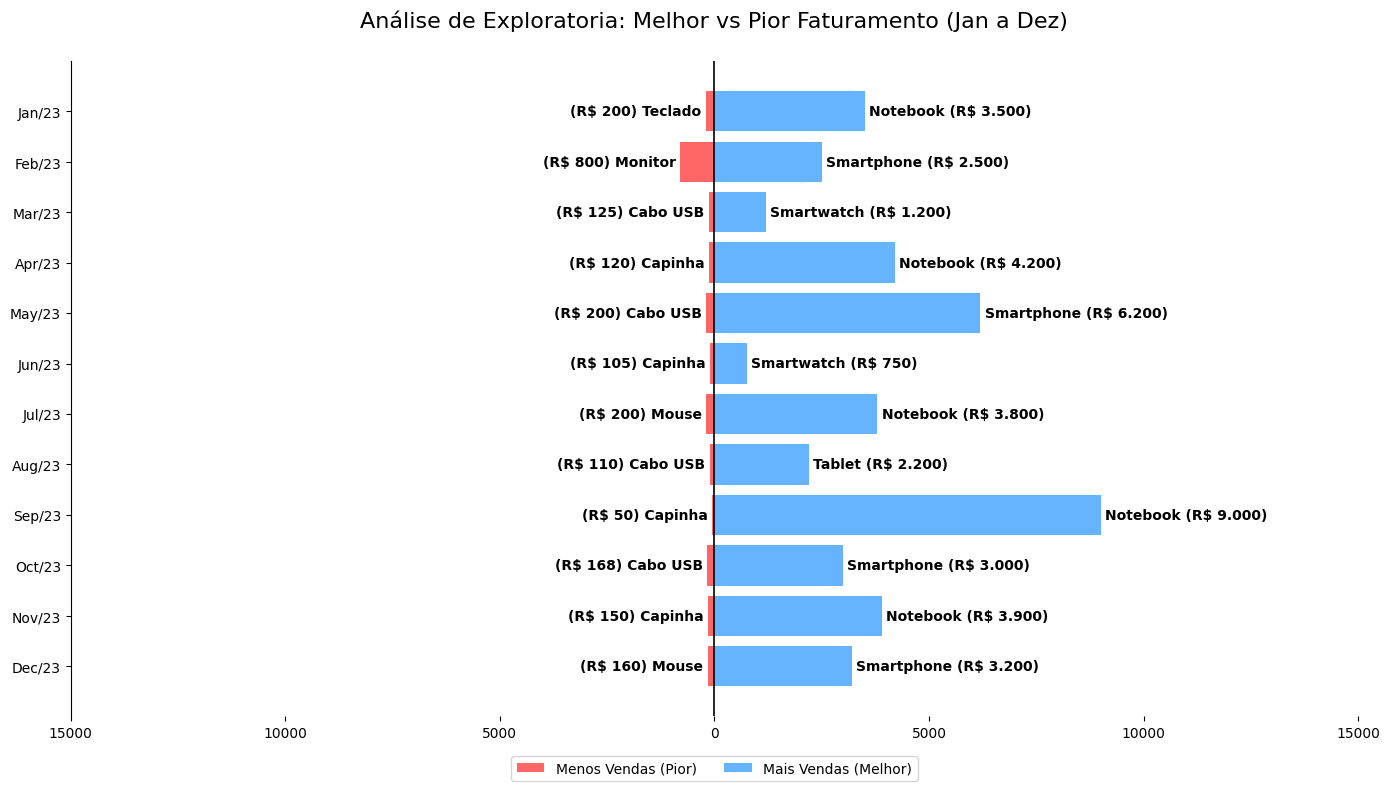

In [92]:

df['data'] = pd.to_datetime(df['data'], dayfirst=True)
df['valor_total'] = df['quantidade'] * df['preco']


df_agrupado = df.groupby([pd.Grouper(key='data', freq='ME'), 'produto'])['valor_total'].sum().reset_index()
df_agrupado = df_agrupado.sort_values('data')


melhores = df_agrupado.loc[df_agrupado.groupby('data')['valor_total'].idxmax()].copy()
piores = df_agrupado.loc[df_agrupado.groupby('data')['valor_total'].idxmin()].copy()

meses_labels = melhores['data'].dt.strftime('%b/%y')
valores_melhores = melhores['valor_total'].values
valores_piores = piores['valor_total'].values * -1 

fig, ax = plt.subplots(figsize=(14, 8))


ax.barh(meses_labels, valores_piores, color='#ff6666', label='Menos Vendas (Pior)')
ax.barh(meses_labels, valores_melhores, color='#66b3ff', label='Mais Vendas (Melhor)')

ax.invert_yaxis() #Invertendo a ordem (Janeiro ficava em ultimo)

for i in range(len(meses_labels)):
    texto_pior = f"(R$ {abs(valores_piores[i]):,.0f}) {piores['produto'].iloc[i]}".replace(',', '.')
    ax.text(valores_piores[i] - 100, i, texto_pior, va='center', ha='right', fontsize=10, fontweight='bold')
    
    texto_melhor = f"{melhores['produto'].iloc[i]} (R$ {valores_melhores[i]:,.0f})".replace(',', '.')
    ax.text(valores_melhores[i] + 100, i, texto_melhor, va='center', ha='left', fontsize=10, fontweight='bold')

ax.axvline(0, color='black', linewidth=1.2)
ax.set_title('Análise de Exploratoria: Melhor vs Pior Faturamento (Jan a Dez)', fontsize=16, pad=25)


limite = max(valores_melhores) * 1.4
ax.set_xlim(-limite, limite)


ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([f'{abs(x):.0f}' for x in ticks])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.tight_layout()
plt.show()